In [1]:
%matplotlib inline
import sys
sys.path.append('/apps')
import django
django.setup()
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
## Use the ggplot style
plt.style.use('ggplot')

# Spatial Analyses for two spatial process
# Case Study: Presence of Abies given a Conifer sample

The study is presented in the East-central region of Mexico (Puebla). The landscape includes ocean to the east (Gulf of Mexico), sharp mountain ridges, with plateau to the west. An orographic shadow is present giving a great diversity of ecosystems 
types.

> This notebook is a copy of [this]('[Spatial Analysis]SampleEffort-Presence.ipynb') with the difference that the GLM is done by the statmodels module

## Data Used
The data extraction has been made with Biospytial. The methods for this are explained in: [here](/DataExtraction/[D.E]Cell Extractor.ipynb)

We have two different datasets. 
* Training Data Set
    
    * 't-puebla-p9-abies-pinophyta'
* Predictor Data Set
    * 'p-100x100-puebla-poly9'


![alt text](puebla-poly9.png)


Each name corresponds to a DataFrame stored in the Redis Instance
To Read the data from here do:


In [2]:
import external_plugins.spystats.biospytial_models.runner as bm
import redis
conn = redis.StrictRedis(host='redis',password='biospytial.')
#trainkey = 't-puebla-p9-abies-pinophyta'
#predkey = 'p-100x100-puebla-poly9'
trainkey = 't-puebla-p4-abies-pinophyta'
predkey = 'p-100x100-puebla-poly4'
PDF = bm.preparePredictors(bm.loadDataFrameFromRedis(predkey,conn))
TDF = bm.loadDataFrameFromRedis(trainkey,conn)

/opt/conda/envs/biospytial/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
INFO:external_plugins.spystats.biospytial_models.runner:Loading data from RedisDB
INFO:external_plugins.spystats.biospytial_models.runner:Loading data from RedisDB


In [3]:
PDF.keys()

[u'full', u'clean']

In [4]:
TDF = TDF.replace('N.A.',np.nan)
## Change to categorical variables
## Associate the categorical variables
TDF['name'] = TDF['name'].astype('category')
TDF['wwf_mhtnam'] = TDF['wwf_mhtnam'].astype('category')
TDF['tipos'] = TDF['tipos'].astype('category')

PDF['clean']['name'] = PDF['clean']['name'].astype('category')
PDF['clean']['wwf_mhtnam'] = PDF['clean']['wwf_mhtnam'].astype('category')
PDF['clean']['tipos'] = PDF['clean']['tipos'].astype('category')

PDF['full']['name'] = PDF['full']['name'].astype('category')
PDF['full']['wwf_mhtnam'] = PDF['full']['wwf_mhtnam'].astype('category')
PDF['full']['tipos'] = PDF['full']['tipos'].astype('category')


/opt/conda/envs/biospytial/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/envs/biospytial/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/biospytial/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [5]:
TDF.describe()

,Pinophyta,Abies,Dist.to.road_m,Elevation_m,MaxTemp_m,MeanTemp_m,MinTemp_m,Population_m,Precipitation_m,SolarRadiation_m,VaporPres_m,WindSp_m,Longitude,Latitude,wwf_mhtnum,cov_id
count,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000
mean,0.094527,0.011609,2998.644926,2159.193016,24.153748,16.662934,24.205398,372.840048,61.251436,17688.906342,1.169214,2.094204,-98.221971,19.050382,5.776949,9723.467662
std,0.292682,0.107161,2315.216964,590.326703,4.453150,4.277470,4.453940,1428.614233,15.184055,375.612466,0.263829,0.383064,0.479484,0.481011,4.777280,844.524329
min,0.000000,0.000000,496.568540,916.777778,12.118287,6.113426,12.157407,2.493028,30.391204,16652.692130,0.245370,1.435185,-99.170563,18.135390,2.000000,8684.000000
25%,0.000000,0.000000,1318.215475,1717.444444,21.018461,13.456944,21.075347,23.120888,49.619792,17424.710069,1.000000,2.000000,-98.631563,18.674390,3.000000,8684.000000
50%,0.000000,0.000000,2191.390999,2290.527778,23.269792,15.440972,23.321759,59.209544,61.642593,17713.104398,1.000000,2.000000,-98.239563,19.066390,3.000000,9930.000000
75%,0.000000,0.000000,3996.619298,2535.763889,27.150937,20.137731,27.198958,177.515505,70.888889,17935.728819,1.379051,2.092361,-97.847563,19.458390,13.000000,10536.000000
max,1.000000,1.000000,17344.973203,4390.666667,33.485667,25.155093,33.580000,16464.841919,127.166667,18674.713889,1.900463,5.199074,-97.308563,19.997390,13.000000,11057.000000


## Descriptive statistics
Pairplot and Correlogram

In [6]:
import seaborn as sb

In [7]:
covs = TDF[['Pinophyta','Abies','Dist.to.road_m','Elevation_m','MaxTemp_m','MeanTemp_m','MinTemp_m','Population_m',  u'Precipitation_m','SolarRadiation_m','VaporPres_m','WindSp_m']]


In [8]:
corr = covs.corr()

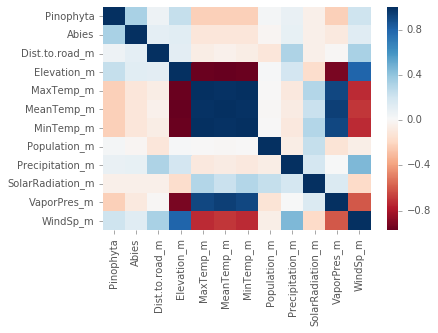

In [9]:
sb.heatmap(corr,cmap=plt.cm.RdBu)

In [10]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [11]:
formula = 'Pinophyta ~ Q("Dist.to.road_m") +  Population_m + tipos'
mod1 = smf.glm(formula=formula, data=TDF, family=sm.families.Binomial()).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Pinophyta   No. Observations:                 1206
Model:                            GLM   Df Residuals:                     1182
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -336.32
Date:                Mon, 28 Jan 2019   Deviance:                       672.64
Time:                        15:10:59   Pearson chi2:                 1.12e+03
No. Iterations:                    23                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                -24.6265   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
tipos[T.Agricultura de Riego]             22.1745   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
tipos[T.Agricultura de Temporal]          22.2385   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
tipos[T.Areas sin Vegetacion Aparente]    22.7002   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
tipos[T.Bosque Cultivado]                 49.0037   1.85e+05      0.000      1.000   -3.63e+05    3.63e+05
tipos[T.Bosque Mesofilo de Montana]       -0.0220   1.85e+05  -1.19e-07      1.000   -3.63e+05    3.63e+05
tipos[T.Bosque de Encino]                 22.4018   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
tipos[T.Bosque de Oyamel]                 24.2814   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
tipos[T.Bosque de Pino]                   22.8768   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
tipos[T.Bosque de Tascate]                22.0445   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
tipos[T.Chaparral]                        -0.0298   1.34e+05  -2.22e-07      1.000   -2.63e+05    2.63e+05
tipos[T.Cuerpos de Agua]                  -0.0921    1.6e+05  -5.74e-07      1.000   -3.14e+05    3.14e+05
tipos[T.Matorral Crasicaule]              -0.0580   1.35e+05  -4.31e-07      1.000   -2.64e+05    2.64e+05
tipos[T.Matorral Desertico Rosetofilo]    22.7798   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
tipos[T.Palmar]                            0.0146   1.85e+05   7.87e-08      1.000   -3.63e+05    3.63e+05
tipos[T.Pastizal Cultivado]               21.9488   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
tipos[T.Pastizal Halofilo]                -1.0695    1.5e+05  -7.15e-06      1.000   -2.93e+05    2.93e+05
tipos[T.Pradera de Alta Montana]          48.8626   1.46e+05      0.000      1.000   -2.87e+05    2.87e+05
tipos[T.Selva Baja Caducifolia]           19.3645   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
tipos[T.Vegetacion Acuatica]               0.0212    1.6e+05   1.32e-07      1.000   -3.14e+05    3.14e+05
tipos[T.Vegetacion Halofila]              22.3113   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
tipos[T.Zona Urbana]                      21.2450   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Q("Dist.to.road_m")                     3.166e-05   4.42e-05      0.717      0.473   -5.49e-05       0.000
Population_m                               0.0001   8.92e-05      1.478      0.139    -4.3e-05       0.000
==========================================================================================================
"""

In [33]:
mod1.conf_int()

,0,1
Intercept,-5.067886,-1.058342
tipos[T.Agricultura de Riego],-1.556860,2.545842
tipos[T.Agricultura de Temporal],-1.096392,2.921828
tipos[T.Areas sin Vegetacion Aparente],-1.669718,4.642155
tipos[T.Bosque Cultivado],-256748.615178,256804.256210
tipos[T.Bosque Mesofilo de Montana],-0.303114,3.767667
tipos[T.Bosque de Encino],-0.994960,3.058507
tipos[T.Bosque de Galeria],-0.756287,4.291594
tipos[T.Bosque de Oyamel],0.904944,5.136889
tipos[T.Bosque de Pino],-0.615657,3.425159


In [30]:
formula = 'Abies ~ Elevation_m + MeanTemp_m'
mod2 = smf.glm(formula=formula, data=TDF, family=sm.families.Binomial()).fit()
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Abies   No. Observations:                 5285
Model:                            GLM   Df Residuals:                     5282
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -272.72
Date:                Thu, 24 Jan 2019   Deviance:                       545.44
Time:                        22:28:35   Pearson chi2:                 1.15e+04
No. Iterations:                     9                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       8.3093      2.935      2.831      0.005       2.556      14.062
Elevation_m    -0.0014      0.001     -2.403      0.016      -0.002      -0.000
MeanTemp_m     -0.6225      0.115     -5.417      0.000      -0.848      -0.397
===============================================================================
"""

## Descriptive Spatial Analysis

INFO:external_plugins.spystats.spystats.tools:Calculating empirical variogram
INFO:external_plugins.spystats.spystats.tools:No envelope object found. Calculating...
INFO:external_plugins.spystats.spystats.tools:Calculating envelope via MonteCarlo Simulations. 
 Using 60 iterations


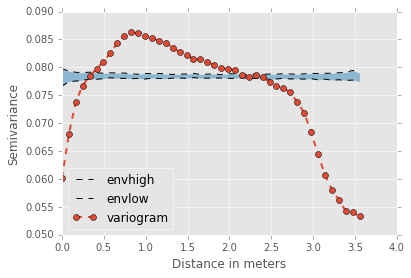

In [16]:
from external_plugins.spystats.spystats import tools as tl 
g1TDF = tl.toGeoDataFrame(TDF,'Longitude','Latitude')
v1TDF = tl.Variogram(g1TDF,'Pinophyta')
v1TDF.plot(with_envelope=True,num_iterations=60)

INFO:external_plugins.spystats.spystats.tools:Calculating empirical variogram
INFO:external_plugins.spystats.spystats.tools:No envelope object found. Calculating...
INFO:external_plugins.spystats.spystats.tools:Calculating envelope via MonteCarlo Simulations. 
 Using 60 iterations


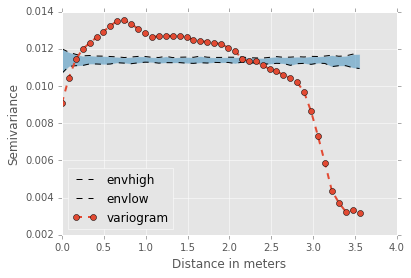

In [17]:
from external_plugins.spystats.spystats import tools as tl 
g2TDF = tl.toGeoDataFrame(TDF,'Longitude','Latitude')
v2TDF = tl.Variogram(g2TDF,'Abies')
v2TDF.plot(with_envelope=True,num_iterations=60)